# Analiza Forbesove liste najboljše ocenjenih športnih klubov 

In [77]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

V moji projektni nalogi sem se odločil analizirati najbolj ocenjena športne klube glede na Forbesovo listo. Podatki so pobrani z Wikipedije. Kasneje sem dodatno vključil tudi najdražje pogodbe športnih igralcev. Podatki so prav tako pobrani iz Wikipedije. 

## Uvoz in urejanje podatkov

In [78]:
import pandas as pd
tabela = pd.read_csv('Klubi.csv', encoding = 'latin1')


Podatke o Forbesovi listi sem spremenil v csv in jih uvozil. Moral sem poskrbeti za manjše napake v tabelah. 

In [79]:
for k in range(122):
    if np.isnan(tabela.loc[k,'Rang']):
        tabela.loc[k,'Rang']=tabela.loc[(k-1), 'Rang']
        tabela.loc[k, 'Vrednost'] = tabela.loc[(k-1), 'Vrednost']

Tabele na spletni strani so bile ločene po letih, ko sem jih združil skupaj je zato manjkal podatek, ki bi nam povedal kateremu letu pripada. Dodal sem stolpec "Leto", in dopolnil podatke, da so ustrezali tistim iz spletne strani. 

In [80]:
tabela['Leto'] = ''

In [81]:
for i in range(0,51):
    tabela.loc[i,'Leto']=2017

In [82]:
tabela.loc[0,'Leto'] = 2017

In [83]:
for i in range(51,61):
    tabela.loc[i,'Leto']=2010

In [84]:
for i in range(61,71):
    tabela.loc[i,'Leto']=2011

In [85]:
for i in range(71,81):
    tabela.loc[i,'Leto']=2012

In [86]:
for i in range(81,91):
    tabela.loc[i,'Leto']=2013

In [87]:
for i in range(91,101):
    tabela.loc[i,'Leto']=2014

In [88]:
for i in range(101,111):
    tabela.loc[i,'Leto']=2015

In [89]:
for i in range(111,122):
    tabela.loc[i,'Leto']=2016

Spodaj je prikazana glava tabele. Stolpci so Rang, Ime kluba, Šport, Država kluba, ocenjena vrednost kluba in pa leto.

In [90]:
tabela.head(10)

,Rang,Ime,Sport,Drzava,Vrednost,Leto
0,1.0,Dallas Cowboys,American Football,United States,4.20,2017
1,2.0,New York Yankees,Baseball,United States,3.70,2017
2,3.0,Manchester United,Football,England,3.69,2017
3,4.0,Barcelona,Football,Spain,3.64,2017
4,5.0,Real Madrid,Football,Spain,3.58,2017
5,6.0,New England Patriots,American Football,United States,3.40,2017
6,7.0,New York Knicks,Basketball,United States,3.30,2017
7,8.0,New York Giants,American Football,United States,3.10,2017
8,9.0,Los Angeles Lakers,Basketball,United States,3.00,2017
9,9.0,San Francisco 49ers,American Football,United States,3.00,2017


In [91]:
tabela_pogodb = pd.read_csv('Pogodbe.csv', encoding = 'latin1')

Nato sem z wikipedije pobral podatke za najdražje pogodbe v zgodovini športa, jih spremenil v csv obliko in jih uvozil sem za nadaljno analizo. Spodaj je prikazana glava tabele. Stolpci so sestavljeni iz ranka, imena igralca, kluba pri katerem je igralec sklenil pogodbo, športa, celotna vrednost pogodbe (niso vse pogodbe sklenjene za isto število let) in še vrednost pogodbe na leto. 

In [92]:
tabela_pogodb.head(10)

,Rank,Ime,Klub,Sport,Vrednost_pogodbe,Vrednost_pogodbe_letno
0,1,Giancarlo Stanton,Miami Marlins,Baseball,325000000,25000000
1,2,Alex Rodriguez,New York Yankees,Baseball,275000000,27500000
2,3,Neymar,Paris Saint Germain,Association football,270000000,54000000
3,4,Alex Rodriguez,Texas Rangers,Baseball,252000000,25200000
4,5,Miguel Cabrera,Detroit Tigers,Baseball,248000000,31000000
5,6,Robinson Cano,Seattle Mariners,Baseball,240000000,24000000
6,6,Albert Pujols,Los Angeles Angels,Baseball,240000000,24000000
7,7,James Harden,Houston Rockets,Basketball,228000000,38000000
8,8,Joey Votto,Cincinnati Reds,Baseball,225000000,22500000
9,8,David Price,Boston Red Sox,Baseball,217000000,31000000


## Analiza podatkov

### Analiza vseh podatkov

Za začetek sem hotel dobiti občutek za podatke. Pogledal sem kateri športi se največkrat pojavijo v Forbesovi listi najboljših klubov.

In [93]:
klubi_po_sportu = tabela.groupby('Sport')

In [94]:
klubi_po_sportu.count()

,Rang,Ime,Drzava,Vrednost,Leto
Sport,,,,,
American Football,61,61,61,61,61
Baseball,19,19,19,19,19
Basketball,11,11,11,11,11
Football,31,31,31,31,31


Močno prevladuje ameriški nogomet, nato nogomet, baseball, zadnja pa je košarka. To je zelo površna analiza, vendar se razlikuje od mojih pričakovanj, pred analizo sem bil namreč prepričan, da so nogometni klubi tisti, ki bodo daleč največ vredni. Potrebno pa se je zavedati, da je za leto 2017 petdeset podatkov, za ostala leta pa le 10. Zato bom v nadaljni analizi naredil dodatno tabelo, kjer bom tudi za leto 2017 vzel le prvih 10 in ponovil tole hitro analizo, občutek imam, da bi podatki lahko obrnili v prid nogometa. 

Nato me je zanimalo katere države so tiste, ki imajo največ "najboljših" klubov. 

In [95]:
klubi_po_drzavah = tabela.groupby('Drzava')

In [96]:
klubi_po_drzavah.count()

,Rang,Ime,Sport,Vrednost,Leto
Drzava,,,,,
England,15,15,15,15,15
Germany,2,2,2,2,2
Spain,14,14,14,14,14
United States,91,91,91,91,91


Podatki niso presenetljivi. Daleč pred vsemi je ZDA. Tako ameriški nogomet, baseball in košarka ima večino dobrih klubov prav tam. Predvidevam, da so Angleški, Nemški in pa Španski klubi predvsem nogometni klubi, kar bom v nadaljni analizi tudi preveril.

In [97]:
sporti_v_evropskih_drzavah = tabela[( tabela.Drzava=='England')].groupby('Sport')

In [98]:
sporti_v_evropskih_drzavah.count()

,Rang,Ime,Drzava,Vrednost,Leto
Sport,,,,,
Football,15,15,15,15,15


Hitro sem preveril za Anglijo, Nemčijo in Španijo in moje predpostavke so bile pravilne. Ne samo da prevladuje nogomet, je tudi edini šport iz evrope, ki se je uvrstil v Forbesovo listo. Ker sem tudi sam prebivalec Evrope sem zato živel v "zmoti", da to drži za celotni svet. 

Zanima pa me tudi kateri klubi so tisti, ki so se največkrat znašli v Forbesovi listi. 

In [99]:
najboljsi_klubi = tabela.groupby('Ime')

In [100]:
najboljsi_klubi.Leto.count().sort_values(ascending=False).head(10)

Ime
Washington Redskins     8
Real Madrid             8
Dallas Cowboys          8
Manchester United       8
New England Patriots    8
New York Yankees        8
New York Giants         7
Barcelona               6
Arsenal                 5
Los Angeles Dodgers     5
Name: Leto, dtype: int64

Sortiral sem podatke in izbral najboljših 10 klubov od leta 2010, torej tistih klubov, ki so se največkrat znašli na Forbesovi listi od takrat naprej. Kot ste velikokrat povedali je pomembno, da analiziramo podatke katere vsaj malo poznamo. Sam sem namreč privrženec Arsenala, angleški nogometni klub, in dobro vem, da niso osvojili nič kaj presenetljivega v zadnjih skoraj 15 letih, vseeno pa so se kar 5krat znašli med najboljšimi klubi in to ne samo v nogometu. Torej klubi niso ocenjeni samo po njihovem trenutnem uspehu temveč tudi po zgodovini, marketingu, sponzorjih,... Pomembno je pripomniti, da tukaj še vedno delam s podatki, kjer je za leto 2017 50 klubov. Če pokomentiram še ostale podatke. Real Madrid, Barcelona in Manchester United so nogometni velikani in tukaj ni nič presenetljivega. Imamo velikane iz Ameriškega nogometa in Baseballa, presenečen sem nad dejstvom, da ni nobenega predstavnika košarke.

In [101]:
pogodbe_po_sportu = tabela_pogodb.groupby('Sport')

In [102]:
pogodbe_po_sportu.count().sort_values('Ime', ascending= False)

,Rank,Ime,Klub,Vrednost_pogodbe,Vrednost_pogodbe_letno
Sport,,,,,
Baseball,60,60,60,60,60
Basketball,37,37,37,37,37
American football,21,21,21,21,21
Association football,4,4,4,4,4
Auto racing,3,3,3,3,3
Hockey,3,3,3,3,3
Boxing,1,1,1,1,1


Preveril sem (na vseh podatkih) kateri športi se največkrat pojavijo med najdražjimi pogodbami. Zanimivo je, da je košarka na drugem mestu, v Forbesovi listi pa so se košarkaški klubi "slabo" uvrstili glede na druge športe. Daleč pred vsemi je Baseball. 

### Analiza podatkov "TOP10" 

Kot rečeno zgoraj sem analiziral podatke iz Forbesove liste na malo neroden način. Za leto 2017 sem imel namreč 50 podatkov za ostala leta pa le 10, zato bom sedaj naredil novo tabelo kjer bo za vsako leto 10 podatkov. 

In [103]:
Forbes_deset = tabela.drop(tabela.index[10:51])

In [104]:
Forbes_deset.sort_values(['Leto', 'Vrednost'], ascending=[True, False])

,Rang,Ime,Sport,Drzava,Vrednost,Leto
51,1.0,Manchester United,Football,England,1.83,2010
52,2.0,Dallas Cowboys,American Football,United States,1.65,2010
53,3.0,New York Yankees,Baseball,United States,1.60,2010
54,4.0,Washington Redskins,American Football,United States,1.55,2010
55,5.0,New England Patriots,American Football,United States,1.36,2010
56,6.0,Real Madrid,Football,Spain,1.32,2010
57,7.0,New York Giants,American Football,United States,1.18,2010
58,8.0,Arsenal,Football,England,1.18,2010
59,9.0,New York Jets,American Football,United States,1.17,2010
60,10.0,Houston Texans,American Football,United States,1.15,2010


Ponovil bom hitre analize na novi tabeli

In [105]:
klubi_po_sportu_10 = Forbes_deset.groupby('Sport')

In [106]:
klubi_po_sportu_10.count().sort_values('Ime', ascending = False)

,Rang,Ime,Drzava,Vrednost,Leto
Sport,,,,,
American Football,36,36,36,36,36
Football,27,27,27,27,27
Baseball,12,12,12,12,12
Basketball,6,6,6,6,6


Vrstni red ostaja enak, tako, da so bile moje predpostavke vseeno napačne, nogomet ni vladar športa. 

In [107]:
klubi_po_drzavah_10 = Forbes_deset.groupby('Drzava')

In [108]:
klubi_po_drzavah_10.count()

,Rang,Ime,Sport,Vrednost,Leto
Drzava,,,,,
England,12,12,12,12,12
Germany,1,1,1,1,1
Spain,14,14,14,14,14
United States,54,54,54,54,54


Prav tako so združene države Amerike trdno na prvem mestu, je pa vseeno opaziti, da se je število Evropskih klubov le malenkost zmanjšalo, število klubov iz Združenih držav Amerike pa skoraj razpolovilo. Iz tega lahko sklepam, da je nekaj Evropskih klubov, ki so "velikani" in se skoraj vedno znajdejo med top 10 klubi, ostali evropski klubi pa niso konkurenčni.

### Grafična analiza podatkov

Sedaj me je zanimalo kako se je vrednost klubov spreminjala skozi čas. Neko grobo predstavitev bi lahko naredil tako, da za vsako leto vzamem povprečje vrednosti klubov in to prikažem skozi leta.

In [109]:
klubi_po_letih = Forbes_deset.groupby('Leto')

In [110]:
klubi_po_letih['Vrednost'].mean()

Leto
2010    1.399000
2011    1.442000
2012    1.607000
2013    2.110900
2014    2.315000
2015    2.842000
2016    3.197273
2017    3.461000
Name: Vrednost, dtype: float64

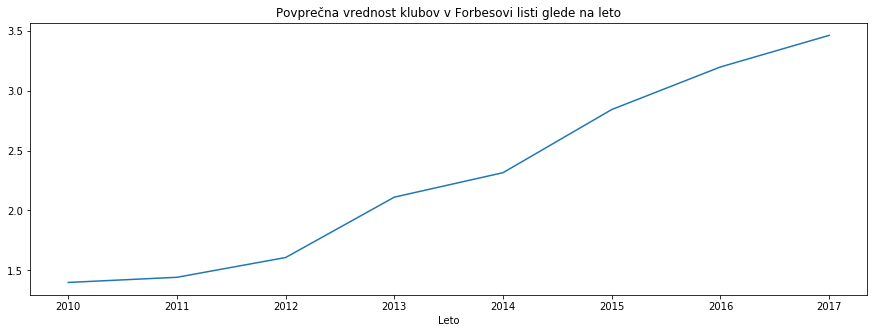

In [134]:
klubi_po_letih['Vrednost'].mean().plot(x='Leto', y = 'Vrednost', title = 'Povprečna vrednost klubov v Forbesovi listi glede na leto')

Vidimo, da povprečje vrednosti klubov skozi čas raste. Zanima me kako se v posameznih letih razlikujejo vrednosti klubov, med prvim in desetim. Pogledal bom za leti 2010 in 2017 in poizkušal poiskati kaj zanimivega.

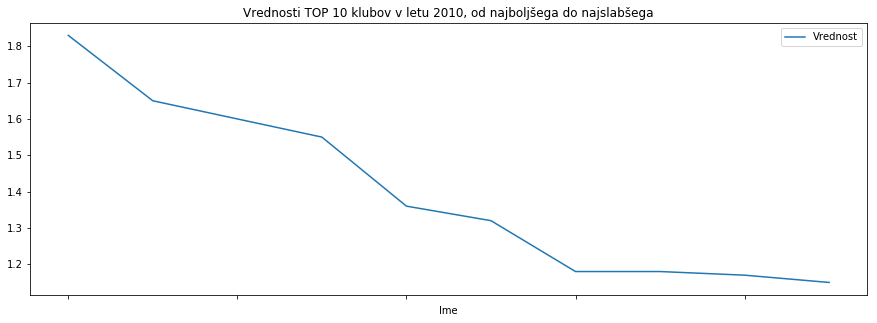

In [142]:
Forbes_deset[Forbes_deset['Leto']==2010].plot(x='Ime', y='Vrednost', title = 'Vrednosti TOP 10 klubov v letu 2010, od najboljšega do najslabšega')

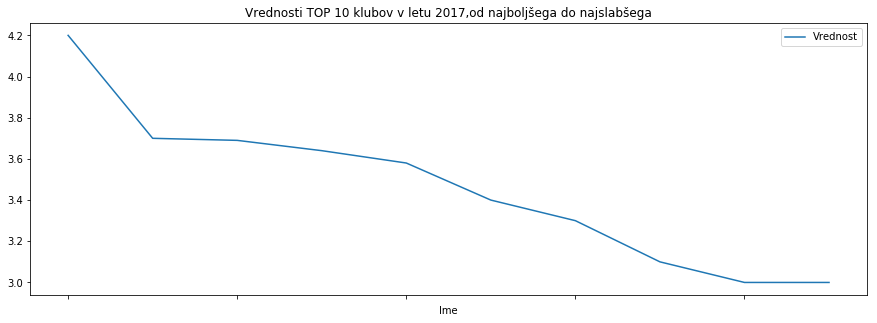

In [141]:
Forbes_deset[Forbes_deset['Leto']==2017].plot(x='Ime', y='Vrednost', title= 'Vrednosti TOP 10 klubov v letu 2017,od najboljšega do najslabšega')

Ne opazim ničesar zanimivega. Če pogledam delež med najbolje ocenjenim in deseto najbolje ocenjenim klubom se iz leta 2010 v leto 2017 ne spremeni drastično. Zanima me ali je morda opaziti kaj zanimivega, če vključim vseh 50 klubov za leto 2017. 

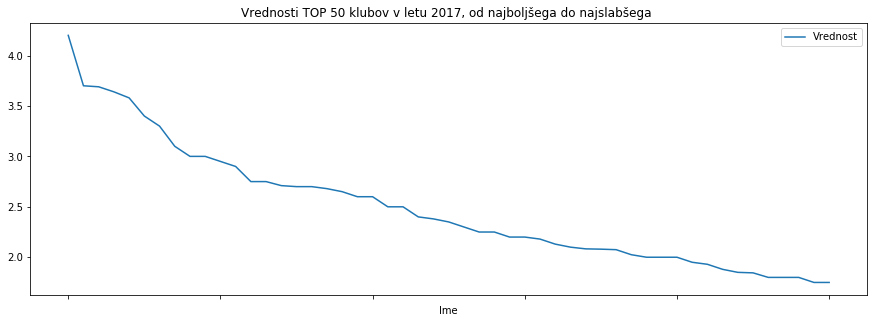

In [140]:
tabela[tabela['Leto']==2017].plot(x='Ime', y='Vrednost', title= 'Vrednosti TOP 50 klubov v letu 2017, od najboljšega do najslabšega ')

Opazim, da vrednost na začetku močno pada, nato pa vedno počasneje, kar je v skladu s pričakovanji. Imamo določeno število klubov, ki so čisto na vrhu in dominirajo na svojih področjih nato pa je vedno več in več klubov, ki so konkurenčni med seboj. 

#### Primerjava med Forbesovo listo in najdražjimi pogodbami

Zgornje analize so pokazale, da je največ najboljše ocenjenih klubov iz Ameriškega nogometa nato nogometa, baseballa in košarke. Rad bi smiselno primerjal podatke med Forbesovo listo in najdražjimi pogodbami. Odločil sem pogledati koliko znašajo povprečne letne pogodbe glede na šport. To bom primerjal s povprečnimi Forbesovimi ocenami glede na šport.  

In [115]:
pogodbe_po_sportu['Vrednost_pogodbe_letno'].mean().sort_values(ascending=False)

Sport
Boxing                  7.200000e+07
Auto racing             3.955556e+07
Association football    3.034500e+07
Basketball              2.344891e+07
Baseball                2.188597e+07
American football       1.812792e+07
Hockey                  8.698535e+06
Name: Vrednost_pogodbe_letno, dtype: float64

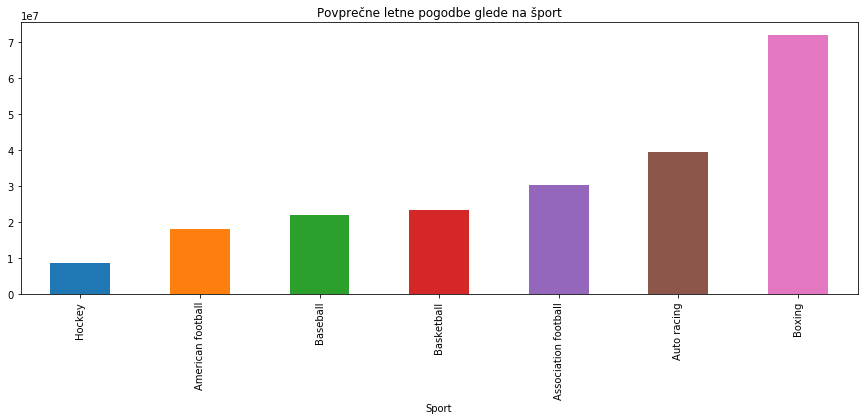

In [133]:
pogodbe_po_sportu['Vrednost_pogodbe_letno'].mean().sort_values().plot.bar(x="Sport",y='Vrednost_pogodbe_letno', title= 'Povprečne letne pogodbe glede na šport')

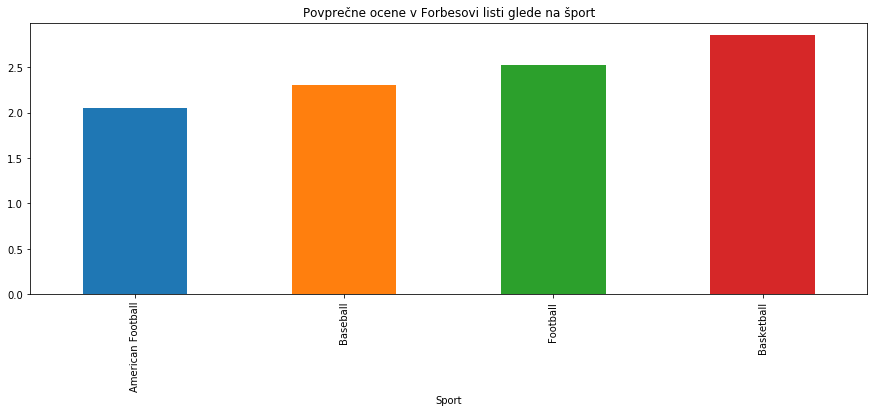

In [131]:
klubi_po_sportu_10['Vrednost'].mean().sort_values().plot.bar(x='Sport', y='Vrednost', title= 'Povprečne ocene v Forbesovi listi glede na šport')

Analiziral bi samo podatke za športe, ki so prisotni na Forbesovi listi. Najdražje letne pogodbe so pri nogometu, nato košarki, baseballu in nazadnje pri Ameriškemu nogometu. Opazimo lahko odstopanja od podatkov iz Forbesove liste,tam je vrstni red namreč Ameriški nogomet < Baseball < Nogomet < Košarka. Pomembno pa je pripomniti, da se števila pogodb za posamezne športe močno razlikujejo. V podatkih imam namreč samo štiri nogometne pogodbe in šestdeset pogodb za baseball, pri povprečju lahko zato pride do večjih odstopanj. Močno preseneča košarka v obeh analizah,saj, ko sem analiziral katerih 10 klubov se je največkrat pojavilo na Forbesovi listi skozi vsa leta, se med njii ni znašel noben košarkaški klub. Imela je tud najmanj predstavnikov v Forbesovih listah na splošno. V analizi povprečne ocenjeni vrednosti pa zasede prvo mesto. 

#### Delež športov in klubov skozi čas 

Zanima me kako se je spreminjal delež športov skozi čas v Forbesovi listi in delež klubov skozi čas. 

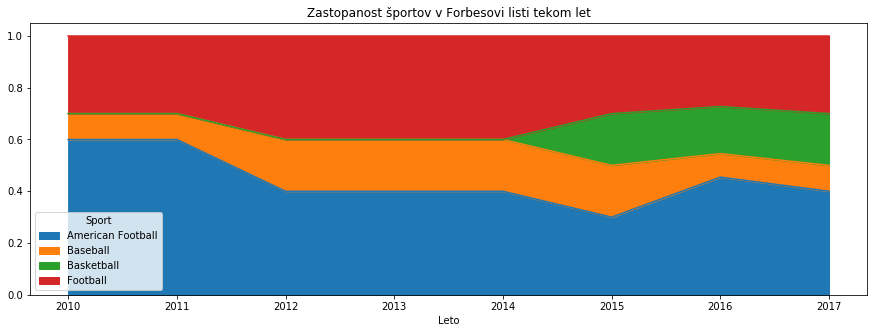

In [129]:
sport_leta = Forbes_deset.groupby(['Leto','Sport']).size().unstack()
delez_sportov_leta = sport_leta.apply(lambda st: st /st.sum(), axis = 1)
delez_sportov_leta.plot(kind='area', title = 'Zastopanost športov v Forbesovi listi tekom let')

Vidimo da skozi vsa leta prevladuje Ameriški nogomet. Leta 2010 je predstavljal kar 60%. Nato je prišel čas nogometa, povečal se je tudi delež baseballa. Leta 2014/2015 se pridruži tudi košarka. Delež Baseballa in nogometa se takrat zmanjša, poveča se delež Ameriškega nogometa. Iz tukaj lahko dobro pokomentiram zakaj ima košarka tako visoko povprečno vrednost v Forbesovih listah. Celotne vrednosti klubov so skozi čas močno rastle. Ker se je košarka vključila šele v zadnjih letih in takrat konkurirala ostalim je v analizo povprečnih vrednosti prišla samo z zelo visokimi vrednostmi. Če bi vključil vrednosti teh košarkaških klubov tudi za leta ko nimam podatkov (2010,2011,...) bi bila povprečna vrednost košarke sigurno drastično nižja. Podoben razmislek nam da odgovore zakaj je povprečna vrednost klubov Ameriškega nogometa "nizka" v primerjavi z ostalimi. Največji delež je Ameriški nogomet predstavljal leta 2010, torej je v analizo povprečnih vrednosti prispeval največji delež ko so bile vse vrednosti "majhne" v primerjavi z današnjimi. Da moje razmisleke podkrepim z rezultati bom naredil povprečno vrednost klubov od leta 2015 naprej (takrat so vključeni vsi športi). 

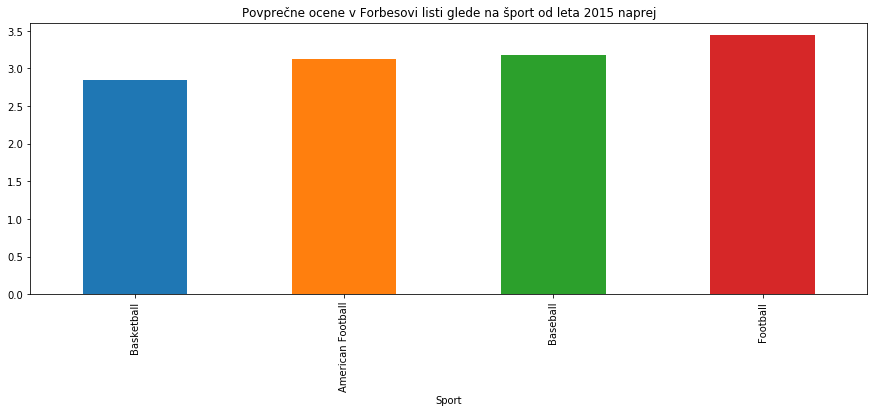

In [147]:
danasnje_vrednosti = Forbes_deset[Forbes_deset.Leto > 2014].groupby('Sport')
danasnje_vrednosti['Vrednost'].mean().sort_values().plot.bar(x='Sport', y='Vrednost', title= 'Povprečne ocene v Forbesovi listi glede na šport od leta 2015 naprej')

Zgornji graf prikazuje bolj realno primerjavo med športi. Čudi me, da je baseball vseeno pred Ameriškim nogometom. Se pa ujema z dejstvom, da je baseball šport, ki je imel daleč največ najdražjih pogodb med vsemi športi. 

Naredil bom tudi zastopanost klubov v Forbesovi listi tekom let. 

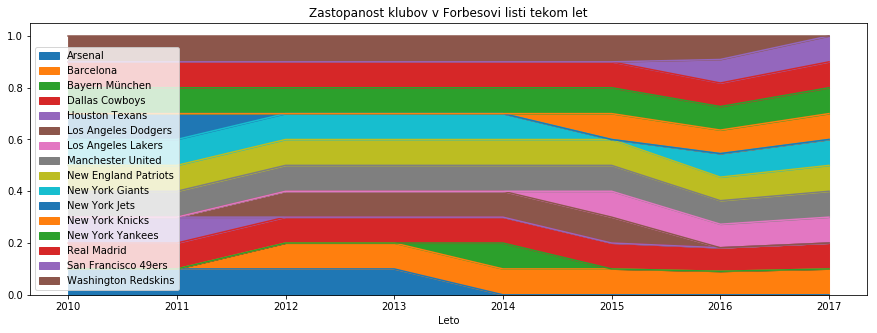

In [130]:
klub_leta = Forbes_deset.groupby(['Leto', 'Ime']).size().unstack()
delez_klubov_leta = klub_leta.apply(lambda st: st/st.sum(), axis = 1)
delez_klubov_leta.plot(kind = 'area', title = 'Zastopanost klubov v Forbesovi listi tekom let').legend(loc = 'lower left')


Deleži niso tako zanimivi, nekateri klubi so člani Forbesove liste skozi vsa leta, torej vedno predstavljajo 1/10, nekateri so bili in niso več ter obratno.  

Za konec še pogled v današnje stanje, torej leto 2017. Kolikšen delež med najboljše ocenjenimi petdesetimi klubi predstavlja kateri šport. 

In [160]:
letos_sport = tabela[tabela.Leto == 2017].groupby('Sport').size()

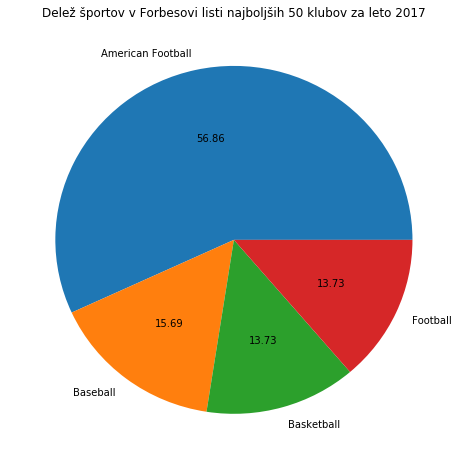

In [161]:
g = letos_sport.plot.pie(figsize =(8,8),autopct = '%.2f',title = 'Delež športov v Forbesovi listi najboljših 50 klubov za leto 2017')
g.set_ylabel('')
plt.show()

Vidimo, da prevladuje Ameriški nogomet drugi je Basebal, košarka in nogomet si delita tretje mesto. Poglejmo še povprečno vrednosti glede na šport samo za leto 2017. 

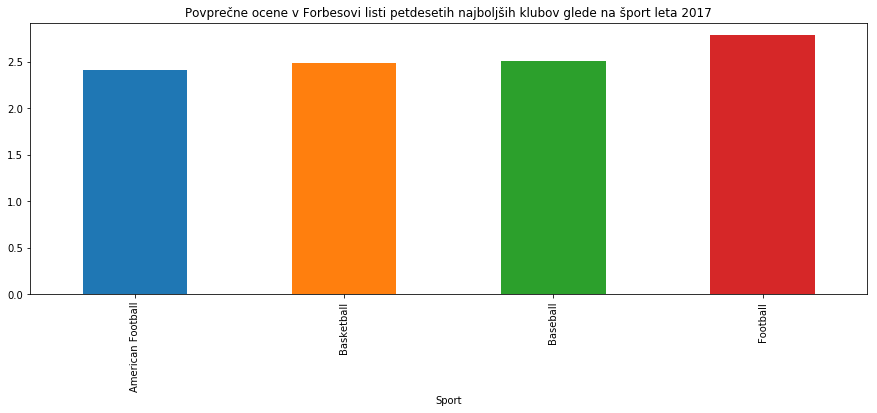

In [165]:
danasnje_vrednosti_2017 = tabela[tabela.Leto == 2017].groupby('Sport')
danasnje_vrednosti_2017['Vrednost'].mean().sort_values().plot.bar(x='Sport', y='Vrednost', title= 'Povprečne ocene v Forbesovi listi petdesetih najboljših klubov glede na šport leta 2017')

Malo nazaj sem naredil analizo od leta 2015 naprej, kjer je bila košarka na zadnjem mestu. Sedaj pa vidim, da je v letu 2017 na drugem mestu. Vključila se je s svojimi predstavniki šele leta 2015 in sedaj po dveh letih že napreduje. Nogomet je na prvem mestu. Ne glede na to, da imata baseball in predvsem Ameriški nogomet večji delež od košarke in nogometa v letu 2017, imata nižje povprečne vrednosti. Razlago vidim zopet v tem, da če se nogometni/košarkaški klub uvrsti v Forbesovo listo, se uvrsti zelo visoko in zato ima visoka povprečja.

## Zaključek 

Podatke sem analiziral z veliko različnih kotov in prišel do ugotovitve, da jih lahko obrnem v prid skoraj katerega koli športa. Če večino ugotovitev strnim sedaj v par povedi. Po številu predstavnikov v Forbesovi listi nedvomno prevladuje Ameriški nogomet. Baseball ima največ predstavnikov pri številu najdražjih pogodb. Nogomet in košarka imata zelo visoke povprečne vrednosti v Forbesovih listah. Cene pogodb in vrednosti klubov se s časom povečujejo. Začetna hipoteza, da bo nogomet vladar športov pa je lahko ovržena ali potrjena, odvisna katere analize pogledam. 